In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 
from scipy.stats import multivariate_normal as mvn
import seaborn as sns

In [2]:
def accurcy(y,y_hat):
    return np.mean(y==y_hat)

In [3]:
def show_img(X):
    plt.imshow(X.reshape(28,28))

In [4]:
def heatmap(y,y_hatgb):
    y_actu=pd.Series(y,name='actual')
    y_predict=pd.Series(y_hatgb,name='predicted')
    HtMp=pd.crosstab(y_actu, y_predict)
    ax=sns.heatmap(HtMp,annot=True,fmt="d")

## Preparing Train set

In [5]:
MNIST_train=pd.read_csv("MNIST_train.csv")

In [6]:
MNIST_train.shape

(60000, 787)

In [7]:
MNIST_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Columns: 787 entries, Unnamed: 0 to 783
dtypes: int64(787)
memory usage: 360.3 MB


In [8]:
MNIST_train.head()

,Unnamed: 0,index,labels,0,1,2,3,4,5,6,...,774,775,776,777,778,779,780,781,782,783
0,0,0,5,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,2,4,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,3,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,4,9,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
X=MNIST_train.iloc[:,3 :]

In [10]:
X.head()

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
y=MNIST_train.iloc[:,2]

In [12]:
y.head()

0    5
1    0
2    4
3    1
4    9
Name: labels, dtype: int64

In [13]:
X=X.to_numpy()
y=y.to_numpy()

In [14]:
X.shape

(60000, 784)

In [15]:
y.shape

(60000,)

Text(0.5, 1.0, '9')

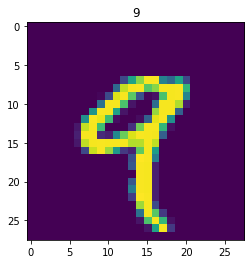

In [63]:
show_img(X[4])
plt.title(str(y[4]))

## Preparing test data

In [18]:
MNIST_test=pd.read_csv("MNIST_test.csv")
MNIST_test.head()

,Unnamed: 0,index,labels,0,1,2,3,4,5,6,...,774,775,776,777,778,779,780,781,782,783
0,0,0,7,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,1,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,2,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,3,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,4,4,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [19]:
MNIST_test.shape

(10000, 787)

In [20]:
MNIST_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Columns: 787 entries, Unnamed: 0 to 783
dtypes: int64(787)
memory usage: 60.0 MB


In [21]:
Xt=MNIST_test.iloc[:,3 :]
Xt.head()

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [22]:
yt=MNIST_test.iloc[:,2]
yt.head()

0    7
1    2
2    1
3    0
4    4
Name: labels, dtype: int64

In [23]:
Xt=Xt.to_numpy()
yt=yt.to_numpy()

Text(0.5, 1.0, 'Actual=2')

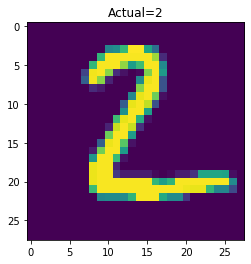

In [24]:
show_img(Xt[1])
plt.title("Actual="+str(yt[1]))

### Normalization

In [25]:
X=X*(1/255)
Xt=Xt*(1/255)

## Guass Naive Bayes

In [27]:
class GaussNB():
    def fit(self,X,y,epsilon=1e-5):
        self.likelihoods=dict()
        self.priors=dict()
        
        self.K=set(y.astype(int))
        for k in self.K:
            X_k=X[y==k,:]
            self.likelihoods[k]={"mean":X_k.mean(axis=0),"cov":X_k.var(axis=0)+epsilon}
            self.priors[k]=len(X_k)/len(X)
    
    def predict(self,X):
        N,D=X.shape
        P_hat=np.zeros((N,len(self.K)))
        
        for k,l in self.likelihoods.items():
            P_hat[:,k]=mvn.logpdf(X,l["mean"],l["cov"])+np.log(self.priors[k])
            
        return P_hat.argmax(axis=1)

In [28]:
gnb=GaussNB()

In [30]:
epsilon_gnb=1e-2

In [31]:
gnb.fit(X,y,epsilon_gnb)

In [32]:
y_hatgnb=gnb.predict(X)

In [33]:
accurcy(y,y_hatgnb)

0.8015833333333333

In [34]:
yt_hatgnb=gnb.predict(Xt)

In [35]:
accurcy(yt,yt_hatgnb)

0.8141

In [38]:
d_gnb = {'train %': [67.25, 76.82,80.15,78.84], 'test %': [67.28, 77.46,81.41,80.13],"epsilon":[1e-5,1e-3, 1e-2,5e-2]}
Acc_d_gnb = pd.DataFrame(data=d_gnb)
Acc_d_gnb.set_index("epsilon",inplace=True)
Acc_d_gnb

,train %,test %
epsilon,,
0.00001,67.25,67.28
0.00100,76.82,77.46
0.01000,80.15,81.41
0.05000,78.84,80.13


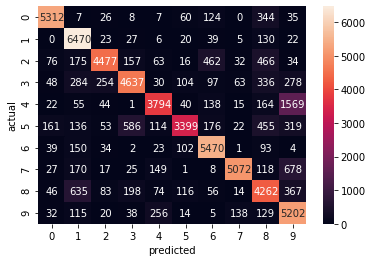

In [58]:
heatmap(y,y_hatgnb)

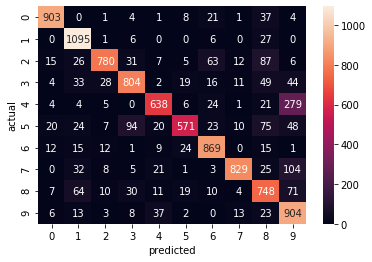

In [59]:
heatmap(yt,yt_hatgnb)

## Gauss Bayes

In [40]:
class GaussBayes():
    def fit(self,X,y,epsilon=1e-2):
        self.likelihoods=dict()
        self.priors=dict()
        
        self.K=set(y.astype(int))
        
        for k in self.K:
            X_k=X[y==k,:]
            N_k,D=X_k.shape
            mu_k=X_k.mean(axis=0)
            self.likelihoods[k]={"mean":X_k.mean(axis=0),"cov":(1/(N_k-1))*np.matmul((X_k-mu_k).T,X_k-mu_k)+epsilon*np.identity(D)}
            self.priors[k]=len(X_k)/len(X)
            
    def predict(self,X):
        N,D=X.shape
        P_hat=np.zeros((N,len(self.K)))
        
        for k,l in self.likelihoods.items():
            P_hat[:,k]=mvn.logpdf(X,l["mean"],l["cov"])+np.log(self.priors[k])
            
        return P_hat.argmax(axis=1)

In [41]:
gbayes=GaussBayes()

In [42]:
epsilon_gb=0.05

In [43]:
gbayes.fit(X,y,epsilon_gb)

In [44]:
y_hatgb=gbayes.predict(X)

In [45]:
accurcy(y,y_hatgb)

0.9592

In [46]:
yt_hatgb=gbayes.predict(Xt)

In [47]:
accurcy(yt,yt_hatgb)

0.9563

In [49]:
d_gb = {'train %': [86.13, 93.03,95.05,95.49,91.58,94.4,95.76,95.92], 'test %': [83.34, 91.08,94.73,95.42,92, 94.53,95.63,95.63],"epsilon":[1e-5,1e-3, 1e-2,1e-1,5e-1,2e-1,7e-2,5e-2]}
Acc_d_gb = pd.DataFrame(data=d_gb)
Acc_d_gb.set_index("epsilon",inplace=True)
Acc_d_gb

,train %,test %
epsilon,,
0.00001,86.13,83.34
0.00100,93.03,91.08
0.01000,95.05,94.73
0.10000,95.49,95.42
0.50000,91.58,92.00
0.20000,94.40,94.53
0.07000,95.76,95.63
0.05000,95.92,95.63


### Heat map for training set

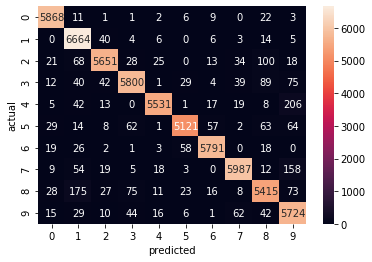

In [50]:
heatmap(y,y_hatgb)

### Heat map for testing set

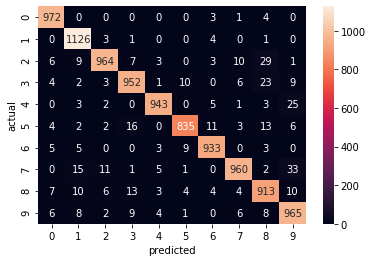

In [51]:
heatmap(yt,yt_hatgb)

## KNN classifier

In [53]:
class KNNClassifier():
    def fit(self,X,y):
        self.X=X
        self.y=y
        
    def predict(self, X, K, epsilon=1e-3):
        N=len(X)
        y_hat= np.zeros(N)

        
        for i in range(N):
            dist2=np.sum((self.X-X[i])**2,axis=1)
            idxt =np.argsort(dist2)[:K]
            gamma_k=1/(np.sqrt(dist2[idxt])+epsilon)
            y_hat[i] = np.bincount(self.y[idxt], weights=gamma_k).argmax()
            
        return y_hat

In [54]:
knn=KNNClassifier()

In [55]:
knn.fit(X,y)

In [56]:
yt_hatknn=knn.predict(Xt,5)

In [57]:
accurcy(yt,yt_hatknn)

0.9691

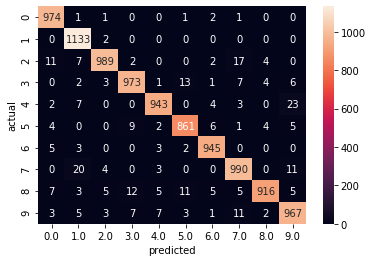

In [60]:
heatmap(yt,yt_hatknn)